# Dados reais

## Importação das bibliotecas e dados

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import random
import math

### Lendo os dados da base tratada

In [20]:
dados = pd.read_excel('bd/base_tratada.xlsx')

Selecionando as colunas de interesse

In [21]:
dados = dados[['nu_os', 'dt_chamado_abertura', 'sla', 'penalidade', 'tempo_solucao']]
dados

,nu_os,dt_chamado_abertura,sla,penalidade,tempo_solucao
0,20247801001772,2024-09-19,2,4,4
1,20247801001773,2024-09-19,2,4,4
2,20244811001405,2024-09-30,2,4,4
3,20244811001523,2024-10-21,2,4,5
4,20244804012047,2024-10-23,2,4,3
...,...,...,...,...,...
1333,20244804010603,2024-09-13,2,4,3
1334,20244804006935,2024-06-10,5,2,14
1335,20244804007378,2024-06-24,2,4,4
1336,20244804006832,2024-06-07,2,4,3


## Definição dos dados do problema

### Definindo uma data de chamados (pela data de abertura)

In [22]:
O_M = dados['dt_chamado_abertura'] == '2024-06-03'
dados = dados[O_M]
dados

,nu_os,dt_chamado_abertura,sla,penalidade,tempo_solucao
11,20244804006445,2024-06-03,5,4,18
21,20244804006648,2024-06-03,5,2,14
25,20244804006652,2024-06-03,5,2,18
30,20244804006629,2024-06-03,5,2,4
55,20244804006665,2024-06-03,2,4,5
57,20244804006502,2024-06-03,5,4,18
102,20244804006497,2024-06-03,5,2,18
108,20244804006399,2024-06-03,2,4,5
111,20244804006546,2024-06-03,5,2,18
132,20244804006636,2024-06-03,5,2,14


### Definindo a quantidade de equipes disponíveis

In [29]:
n_equipes = 6 #equipes
equipes = np.arange(1, n_equipes + 1)  

### Separando os dados do problema (tarefas, sla, tempo de execução e penalidades)

In [24]:
tarefas = dados['nu_os'].values
sla = dados['sla'].values
tempo_execucao = dados['tempo_solucao'].values
penalidades = dados['penalidade'].values

## Solução por força-bruta

Melhor combinação:
Permutação: (20244804008620, 20244804008635, 20244804008631)
Alocação: (1, 1, 2)
Penalidade total: 58.00
Tarefa 20244804008620:
  - Equipe: 1
  - Início: 0.00
  - Final: 3.00
  - Atraso: 1.00
  - Penalidade: 12.00
Tarefa 20244804008635:
  - Equipe: 1
  - Início: 3.00
  - Final: 8.00
  - Atraso: 6.00
  - Penalidade: 30.00
Tarefa 20244804008631:
  - Equipe: 2
  - Início: 0.00
  - Final: 4.00
  - Atraso: 2.00
  - Penalidade: 16.00


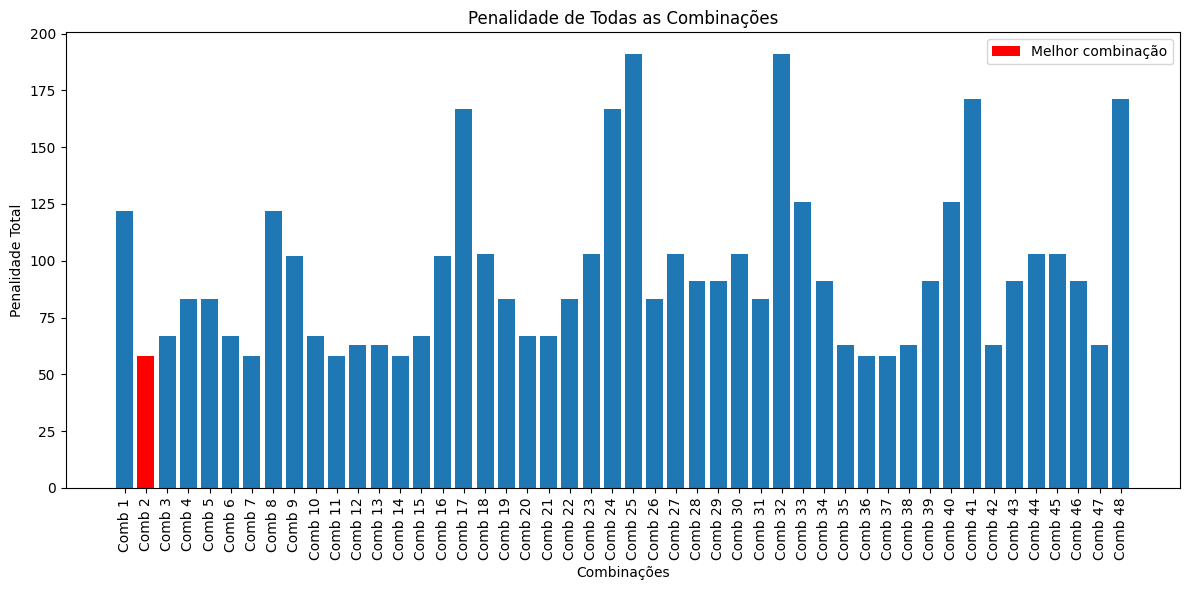

In [18]:
# Todas as permutações das tarefas
permutacoes_tarefas = list(itertools.permutations(tarefas))

# Todas as combinações possíveis de alocação
combinacoes_equipes = list(itertools.product(equipes, repeat=len(tarefas)))

# Armazenar os resultados
resultados = []

# Avaliar todas as permutações e combinações
for permutacao in permutacoes_tarefas:
    for combinacao in combinacoes_equipes:
        disponibilidade_equipes = np.zeros(len(equipes))  # Disponibilidade inicial das equipes
        penalidade_total = 0
        combinacao_resultados = []
        
        for tarefa_idx, tarefa in enumerate(permutacao):
            equipe = combinacao[tarefa_idx]
            equipe_idx = equipe - 1
            tarefa_original_idx = np.where(tarefas == tarefa)[0][0]  # Índice da tarefa original
            
            inicio_tarefa = disponibilidade_equipes[equipe_idx]
            fim_tarefa = inicio_tarefa + tempo_execucao[tarefa_original_idx]
            
            # Calcular atraso e penalidade
            atraso = max(0, fim_tarefa - sla[tarefa_original_idx])
            penalidade_final = atraso * penalidades[tarefa_original_idx]
            
            # Atualizar disponibilidade da equipe
            disponibilidade_equipes[equipe_idx] = fim_tarefa
            
            # Registrar os resultados da tarefa
            combinacao_resultados.append((tarefa, equipe, inicio_tarefa, fim_tarefa, atraso, penalidade_final))
            penalidade_total += penalidade_final
        
        # Armazenar penalidade total da combinação
        resultados.append((permutacao, combinacao, penalidade_total, combinacao_resultados))

# Encontrar a combinação com menor penalidade
melhor_combinacao = min(resultados, key=lambda x: x[2])

# Exibir resultados
print("Melhor combinação:")
print(f"Permutação: {melhor_combinacao[0]}")
print(f"Alocação: {melhor_combinacao[1]}")
print(f"Penalidade total: {melhor_combinacao[2]:.2f}")
for tarefa in melhor_combinacao[3]:
    print(f"Tarefa {tarefa[0]}:")
    print(f"  - Equipe: {tarefa[1]}")
    print(f"  - Início: {tarefa[2]:.2f}")
    print(f"  - Final: {tarefa[3]:.2f}")
    print(f"  - Atraso: {tarefa[4]:.2f}")
    print(f"  - Penalidade: {tarefa[5]:.2f}")

# Plotar penalidades de todas as combinações
penalidades_totais = [resultado[2] for resultado in resultados]
labels = [f"Comb {i+1}" for i in range(len(resultados))]

plt.figure(figsize=(12, 6))
plt.bar(labels, penalidades_totais)
plt.xlabel("Combinações")
plt.ylabel("Penalidade Total")
plt.title("Penalidade de Todas as Combinações")
plt.xticks(rotation=90)

# Destaque da menor penalidade
min_idx = penalidades_totais.index(melhor_combinacao[2])
plt.bar(labels[min_idx], penalidades_totais[min_idx], color="red", label="Melhor combinação")
plt.legend()
plt.tight_layout()
plt.show()

## Solução Simulated Annealing

In [27]:
# Função de custo
def calcular_custo(solucao):
    permutacao, alocacao = solucao
    disponibilidade_equipes = np.zeros(len(equipes))  # Disponibilidade inicial das equipes
    penalidade_total = 0

    for tarefa_idx, tarefa in enumerate(permutacao):
        equipe = alocacao[tarefa_idx]
        equipe_idx = equipe - 1
        tarefa_original_idx = np.where(tarefas == tarefa)[0][0]  # Índice da tarefa original

        inicio_tarefa = disponibilidade_equipes[equipe_idx]
        fim_tarefa = inicio_tarefa + tempo_execucao[tarefa_original_idx]

        # Calcular atraso e penalidade
        atraso = max(0, fim_tarefa - sla[tarefa_original_idx])
        penalidade_final = atraso * penalidades[tarefa_original_idx]

        # Atualizar disponibilidade da equipe
        disponibilidade_equipes[equipe_idx] = fim_tarefa

        # Acumular penalidade total
        penalidade_total += penalidade_final

    return penalidade_total

# Gerar uma solução inicial
def gerar_solucao_inicial():
    permutacao_inicial = list(tarefas)  # Ordem inicial das tarefas
    random.shuffle(permutacao_inicial)  # Embaralhar ordem
    alocacao_inicial = [random.choice(equipes) for _ in tarefas]  # Alocação aleatória
    return permutacao_inicial, alocacao_inicial

# Gerar uma solução vizinha (perturbação)
def gerar_vizinho(solucao):
    permutacao, alocacao = solucao
    nova_permutacao = permutacao.copy()
    nova_alocacao = alocacao.copy()

    # Escolher aleatoriamente se alterar a ordem ou a alocação
    if random.random() < 0.5:  # Alterar ordem
        idx1, idx2 = random.sample(range(len(tarefas)), 2)
        nova_permutacao[idx1], nova_permutacao[idx2] = nova_permutacao[idx2], nova_permutacao[idx1]
    else:  # Alterar alocação
        idx = random.randint(0, len(tarefas) - 1)
        nova_alocacao[idx] = random.choice(equipes)

    return nova_permutacao, nova_alocacao

# Simulated Annealing
def simulated_annealing(temperatura_inicial, resfriamento, iteracoes_por_temperatura):
    solucao_atual = gerar_solucao_inicial()
    custo_atual = calcular_custo(solucao_atual)
    melhor_solucao = solucao_atual
    melhor_custo = custo_atual

    temperatura = temperatura_inicial

    while temperatura > 0.1:  # Critério de parada: temperatura muito baixa
        for _ in range(iteracoes_por_temperatura):
            vizinho = gerar_vizinho(solucao_atual)
            custo_vizinho = calcular_custo(vizinho)
            delta = custo_vizinho - custo_atual

            # Critério de aceitação
            if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temperatura):
                solucao_atual = vizinho
                custo_atual = custo_vizinho

                # Atualizar a melhor solução
                if custo_atual < melhor_custo:
                    melhor_solucao = solucao_atual
                    melhor_custo = custo_atual

        # Resfriamento
        temperatura *= resfriamento

    return melhor_solucao, melhor_custo

# Parâmetros do Simulated Annealing
temperatura_inicial = 1000
resfriamento = 0.95
iteracoes_por_temperatura = 100

# Resolver o problema
melhor_solucao, melhor_custo = simulated_annealing(temperatura_inicial, resfriamento, iteracoes_por_temperatura)

# Exibir resultados
print("Melhor solução encontrada:")
print(f"Permutação (ordem das tarefas): {melhor_solucao[0]}")
print(f"Alocação (tarefas às equipes): {melhor_solucao[1]}")
print(f"Custo total (penalidade): {melhor_custo:.2f}")

# Detalhamento da solução final
permutacao, alocacao = melhor_solucao
disponibilidade_equipes = np.zeros(len(equipes))
contagem_tarefas = {equipe: 0 for equipe in equipes}  # Contar tarefas por equipe

print("\n--- Detalhamento da Melhor Solução ---")
for tarefa_idx, tarefa in enumerate(permutacao):
    equipe = alocacao[tarefa_idx]
    equipe_idx = equipe - 1
    tarefa_original_idx = np.where(tarefas == tarefa)[0][0]

    inicio_tarefa = disponibilidade_equipes[equipe_idx]
    fim_tarefa = inicio_tarefa + tempo_execucao[tarefa_original_idx]
    atraso = max(0, fim_tarefa - sla[tarefa_original_idx])
    penalidade = atraso * penalidades[tarefa_original_idx]

    disponibilidade_equipes[equipe_idx] = fim_tarefa
    contagem_tarefas[equipe] += 1  # Incrementar contagem de tarefas da equipe

    print(f"Tarefa {tarefa}:")
    print(f"  - Equipe: {equipe}")
    print(f"  - Início: {inicio_tarefa:.2f}")
    print(f"  - Final: {fim_tarefa:.2f}")
    print(f"  - Atraso: {atraso:.2f}")
    print(f"  - Penalidade: {penalidade:.2f}")

# Mostrar contagem de tarefas por equipe
print("\n--- Contagem de Tarefas por Equipe ---")
for equipe, qtd in contagem_tarefas.items():
    print(f"Equipe {equipe}: {qtd} tarefas")


Melhor solução encontrada:
Permutação (ordem das tarefas): [20244811000761, 20244804006417, 20244804006403, 20247801000935, 20244811000756, 20244811000755, 20244804006397, 20244804006426, 20244804006599, 20247801000936, 20244811000758, 20244804006665, 20244804006416, 20244804006666, 20247801000929, 20247801000932, 20244804006590, 20244804006399, 20244804006436, 20244804006629, 20244804006583, 20244804006478, 20244804006451, 20244804006648, 20244804006479, 20244811000760, 20244804006636, 20244804006450, 20244811000762, 20244804006452, 20244804006502, 20244804006598, 20244804006477, 20244804006445, 20244804006529, 20244804006527, 20247801000930, 20244804006530, 20244804006546, 20244804006525, 20244804006497, 20244804006652]
Alocação (tarefas às equipes): [5, 7, 8, 3, 1, 5, 11, 9, 8, 6, 10, 9, 8, 12, 5, 2, 10, 1, 3, 9, 1, 11, 5, 9, 10, 7, 3, 8, 4, 2, 7, 2, 12, 4, 11, 11, 6, 1, 3, 12, 6, 4]
Custo total (penalidade): 1476.00

--- Detalhamento da Melhor Solução ---
Tarefa 20244811000761:
  -